In [1]:
import numpy as np
import random

In [2]:
np.random.seed(10111)
n_all, train_percent = 60, 0.9
x_min, x_max = 5, 105
x = np.random.uniform(x_min, x_max, n_all)
mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)
in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent), 
                            replace=False)
def y_func (x) :
    return(7 + 3.5*np.sin((x - 30)/12))
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)
y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

print(x_test)

[17.68487953 71.17839961 64.03614921 10.81804312 98.23707759 63.54469552]


In [3]:
import matplotlib.pyplot as plt

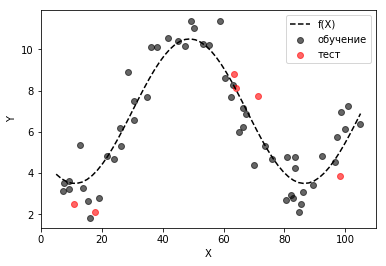

In [4]:
plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)
#  тестовая выборка
plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)
#  истинная функция взаимосвязи
plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(X)')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')

#  легенда
plt.legend()
plt.show()

In [5]:
from pandas import DataFrame
import rpy2.robjects as robjects
from scipy.interpolate import UnivariateSpline, CubicSpline

[  7.37849778  31.76462965  56.15076152  80.53689339 104.92302526]


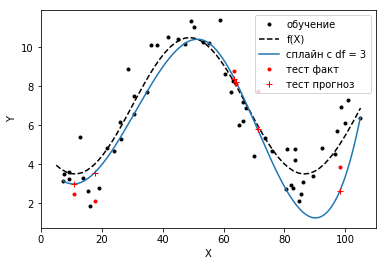

"\nmy_df = 38\n\n# сохраняем индексы отсортированного по возрастанию x из обучающей выборки\nx_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])\n\n# равноотстоящие координаты по X для прорисовки сглаженной кривой\nx_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)\n\n# создаём из данных объекты, понятные R\nr_x = robjects.FloatVector(x_train)\nr_y = robjects.FloatVector(y_train)\n\n# импортируем нужную функцию из R\nr_smooth_spline = robjects.r['smooth.spline']\n\n# строим сглаживающий сплайн\nfit = r_smooth_spline(x=r_x, y=r_y, df=my_df)\n\n# делаем прогнозы\ny_hat_train = np.array(robjects.r['predict'](fit, \n    robjects.FloatVector(x_train)).rx2('y'))\ny_hat_test = np.array(robjects.r['predict'](fit, \n    robjects.FloatVector(x_test)).rx2('y'))\ny_lin_plot = np.array(robjects.r['predict'](fit, \n    robjects.FloatVector(x_train_lin)).rx2('y'))\n\n# строим график\nplt.plot(x_train, y_train, color='black', ls='', marker='.', label='обуч

In [6]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 3

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
print(x_train_uni)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()
'''
my_df = 38

# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])

# равноотстоящие координаты по X для прорисовки сглаженной кривой
x_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)

# создаём из данных объекты, понятные R
r_x = robjects.FloatVector(x_train)
r_y = robjects.FloatVector(y_train)

# импортируем нужную функцию из R
r_smooth_spline = robjects.r['smooth.spline']

# строим сглаживающий сплайн
fit = r_smooth_spline(x=r_x, y=r_y, df=my_df)

# делаем прогнозы
y_hat_train = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train)).rx2('y'))
y_hat_test = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_test)).rx2('y'))
y_lin_plot = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train_lin)).rx2('y'))

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')

# считаем MSE
MSE_fit = [sum((y_train - y_hat_train)**2) / len(y_train),
          sum((y_test - y_hat_test)**2) / len(y_test)]'''

[  7.37849778  19.57156372  31.76462965  43.95769559  56.15076152
  68.34382745  80.53689339  92.72995932 104.92302526]


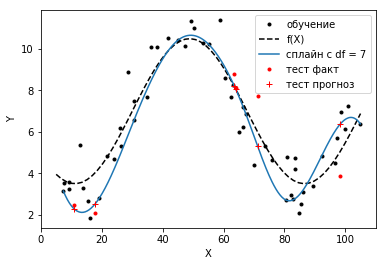

In [7]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 7

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
print(x_train_uni)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

[  7.37849778  14.34596403  21.31343028  28.28089653  35.24836278
  42.21582902  49.18329527  56.15076152  63.11822777  70.08569402
  77.05316026  84.02062651  90.98809276  97.95555901 104.92302526]


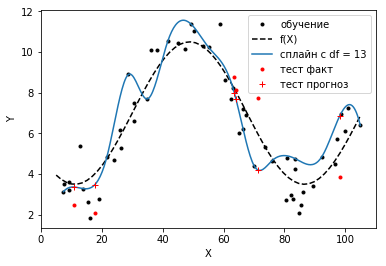

In [8]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 13

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
print(x_train_uni)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

[  7.37849778  12.25572416  17.13295053  22.0101769   26.88740328
  31.76462965  36.64185602  41.5190824   46.39630877  51.27353515
  56.15076152  61.02798789  65.90521427  70.78244064  75.65966701
  80.53689339  85.41411976  90.29134614  95.16857251 100.04579888
 104.92302526]


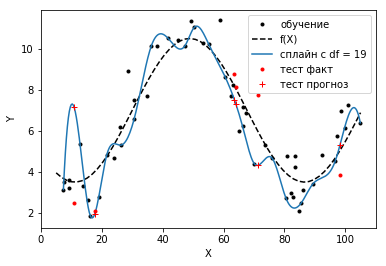

In [9]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 19

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
print(x_train_uni)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

[  7.37849778  10.86223091  14.34596403  17.82969716  21.31343028
  24.7971634   28.28089653  31.76462965  35.24836278  38.7320959
  42.21582902  45.69956215  49.18329527  52.6670284   56.15076152
  59.63449464  63.11822777  66.60196089  70.08569402  73.56942714
  77.05316026  80.53689339  84.02062651  87.50435964  90.98809276
  94.47182588  97.95555901 101.43929213 104.92302526]


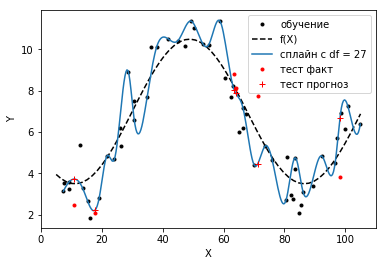

In [10]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 27

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
print(x_train_uni)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots),  max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

In [11]:
x_train = sorted(x_train)
y_train_index = sorted(range(len(y_train)), key=lambda k: x_train[k])
y_train = y_train[y_train_index]

x_test = sorted(x_test)
y_test_index = sorted(range(len(y_test)), key=lambda k: x_test[k])
y_test = y_test[y_test_index]

s = [i for i in range(0, len(x_train * 50), int(len(x_train) / 2))]
MSE_all = [[0] * 2 for i in range(len(s))]
MSE_all = DataFrame(MSE_all, columns=['MSE_train', 'MSE_test'], index=s)

for s_i in s:
    spl = UnivariateSpline(x_train, y_train, k=3, s=s_i)
    MSE_all.loc[s_i, 'MSE_train'] = sum((y_train - spl(x_train)) ** 2) / len(y_train)
    MSE_all.loc[s_i, 'MSE_test'] = sum((y_test - spl(x_test)) ** 2) / len(y_test)

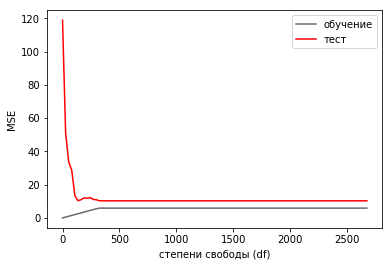

In [12]:
plt.plot(MSE_all.index, MSE_all['MSE_train'], color='dimgrey',
         marker='', label='обучение')
plt.plot(MSE_all.index, MSE_all['MSE_test'], color='red',
         marker='', label='тест')
#  подписи осей
plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
# легенда
plt.legend(loc='best')
plt.show()

324


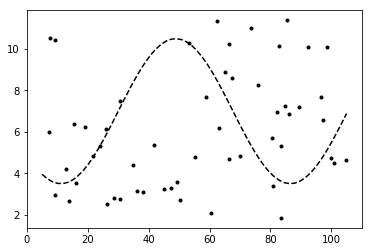

In [13]:
s_best = MSE_all[MSE_all['MSE_test'] == min(MSE_all['MSE_test'])].index[0]
print(s_best)
spl = UnivariateSpline(x_train, y_train, k=3, s=s_i)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train), max(x_train), num=300)
y_train_for_plot = spl(x_train_for_plot)

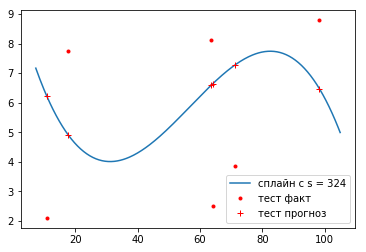

In [14]:
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с s = %s' % s_best)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, spl(x_test), color='red', ls='', marker='+', label='тест прогноз')
plt.legend(loc='best')
plt.show()